In [1]:
# import base libraries for EDA
import pandas as pd
import numpy as np

# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression , LinearRegression

In [2]:
# load dataset and check the first five rows
df_path  = r"D:\Code\AI\Linear Regression\3\USA_Housing.csv"
df = pd.read_csv(df_path)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
# some basic info about the dataset
print('\nDataset Info:')
print(df.info())
print('='*50)
print('\nDataset Description:')
print(df.describe())
print('='*50)
print('\nDataset Shape:', df.shape)
print('='*50)
print('\nMissing Values in each column:\n', df.isnull().sum())
print('='*50)
print('\nDuplicate Rows:', df.duplicated().sum())
print('='*50)
print('\nColumns in the dataset:\n', df.columns)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None

Dataset Description:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.9914

In [4]:
# numerical columns & categorical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(df.columns)
print('\nNumerical Columns:', num_cols)
print('\nCategorical Columns:', cat_cols)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

Numerical Columns: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

Categorical Columns: ['Address']


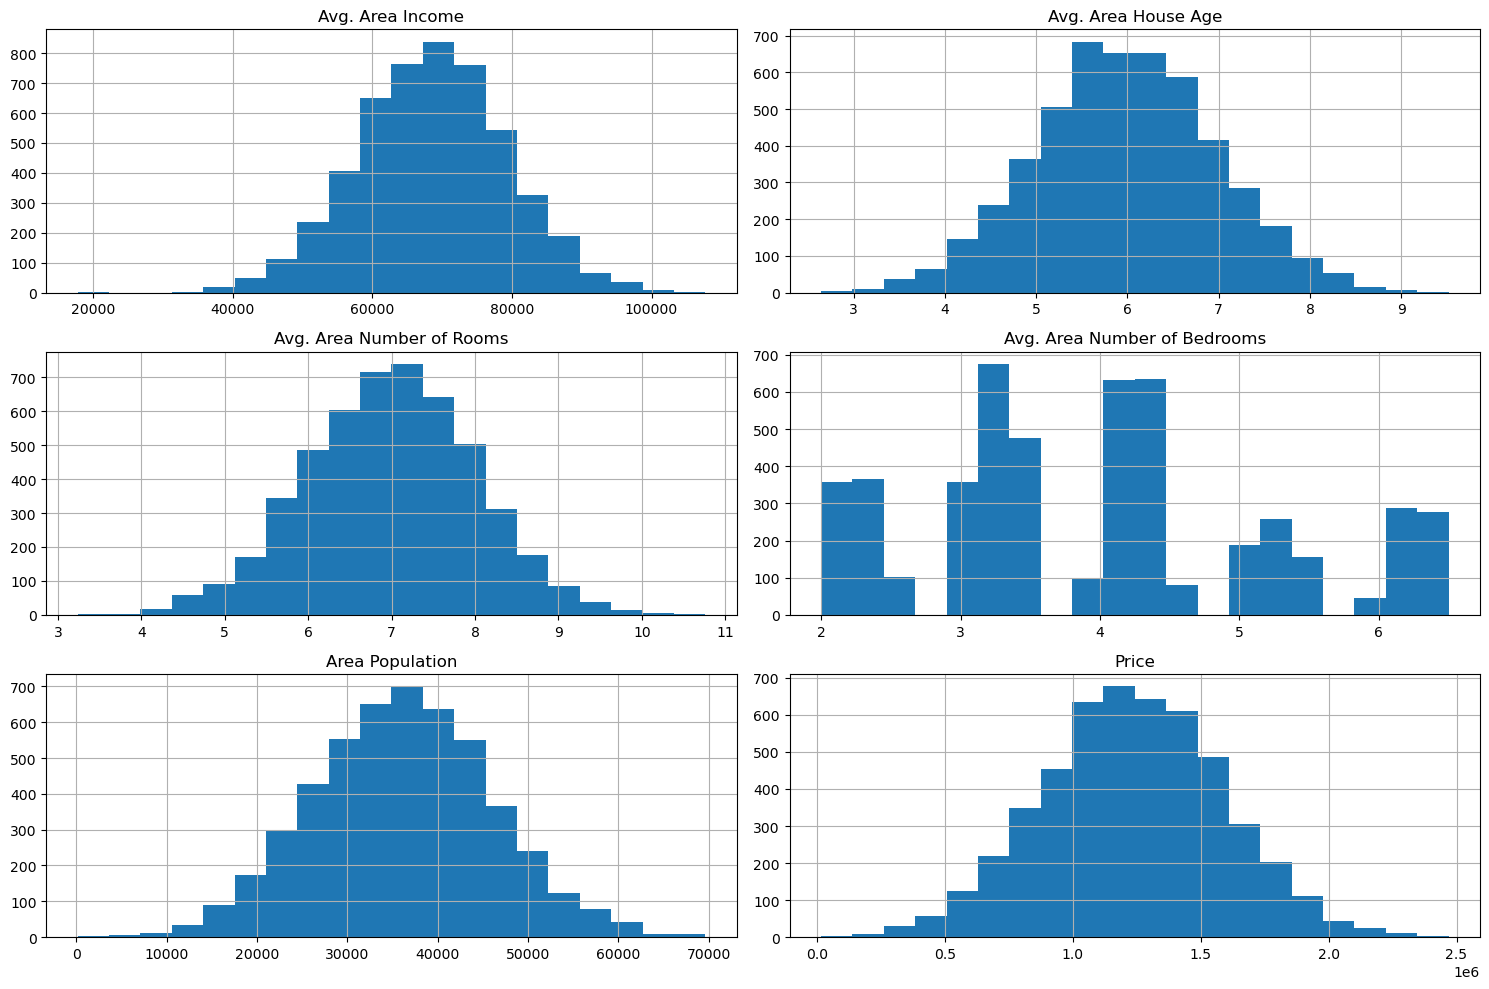

In [8]:
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout() # To prevent labels from overlapping
plt.show()

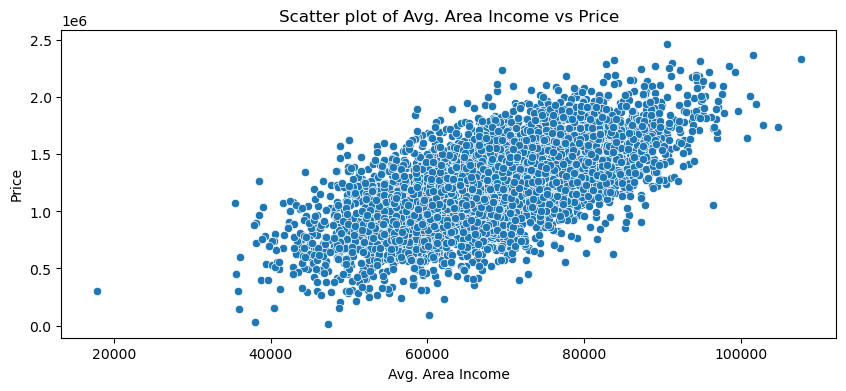

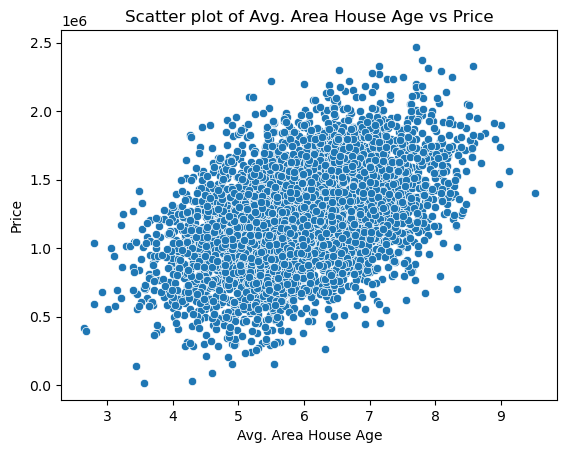

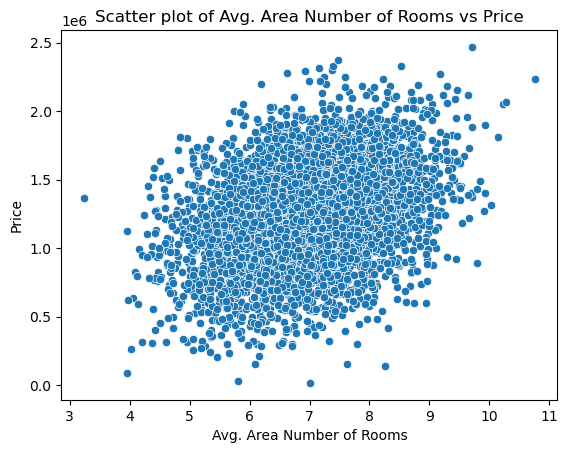

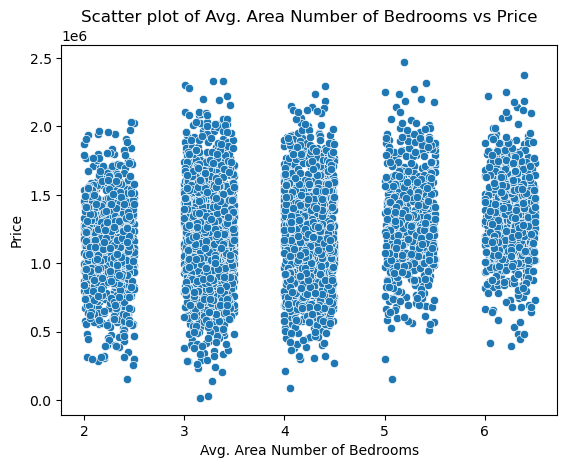

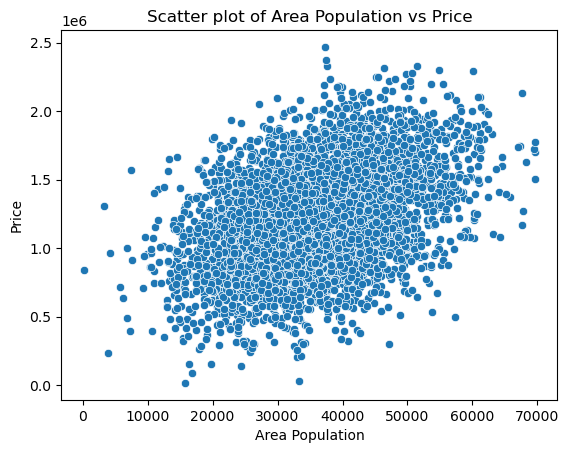

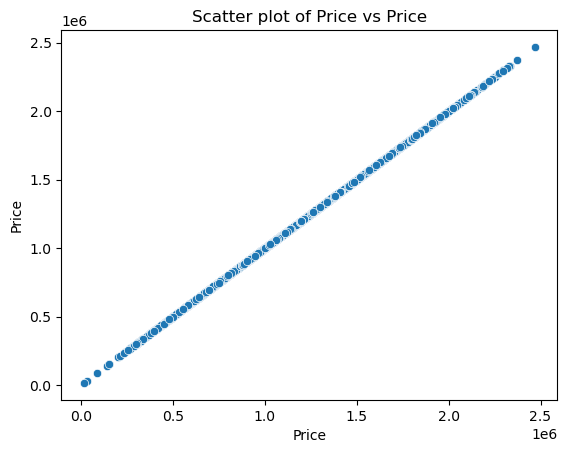

In [18]:
plt.figure(figsize=(10 , 4))
for col in num_cols:
    sns.scatterplot(data=df, x=col, y='Price')
    plt.title(f'Scatter plot of {col} vs Price')
    plt.show()


In [19]:
df.drop(columns=['Address'] , inplace = True)

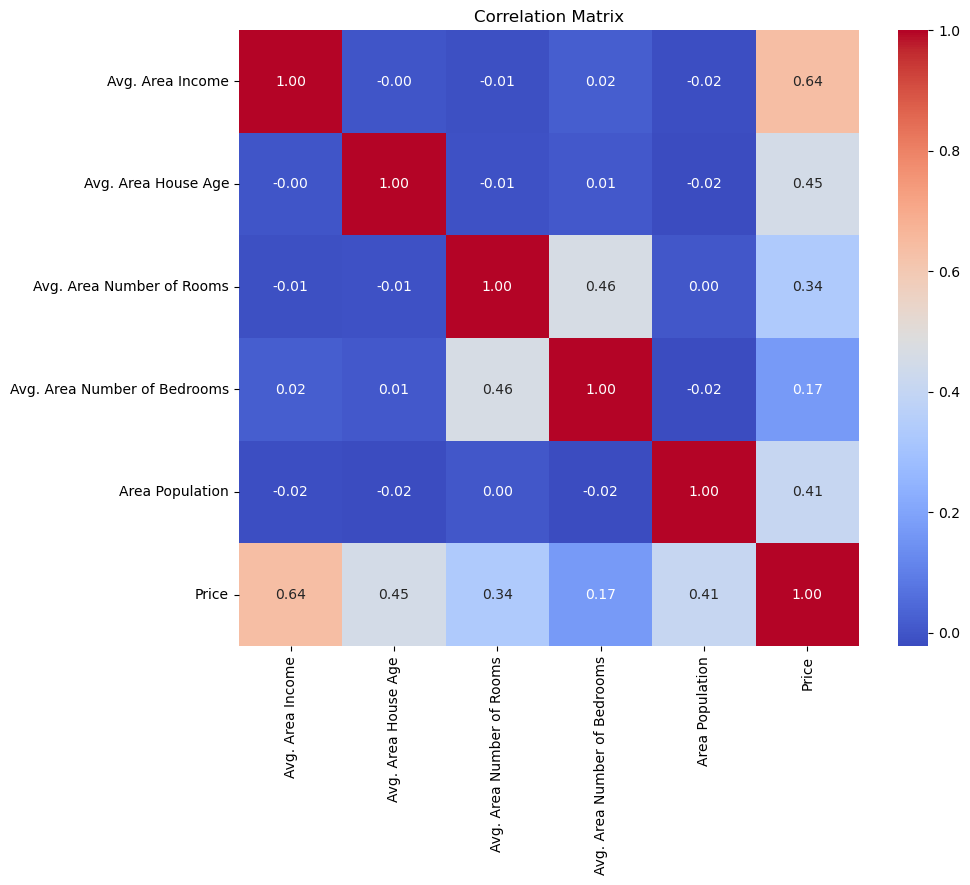

In [20]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df

Duplicate Rows: 0
Duplicate Rows after removing duplicates: 0
Dataset Shape after removing duplicates: (5000, 6)
Missing Values in each column:
 Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64
Number of outliers in Avg. Area Income: 32
Number of outliers in Avg. Area House Age: 25
Number of outliers in Avg. Area Number of Rooms: 24
Number of outliers in Avg. Area Number of Bedrooms: 0
Number of outliers in Area Population: 30
Number of outliers in Price: 35


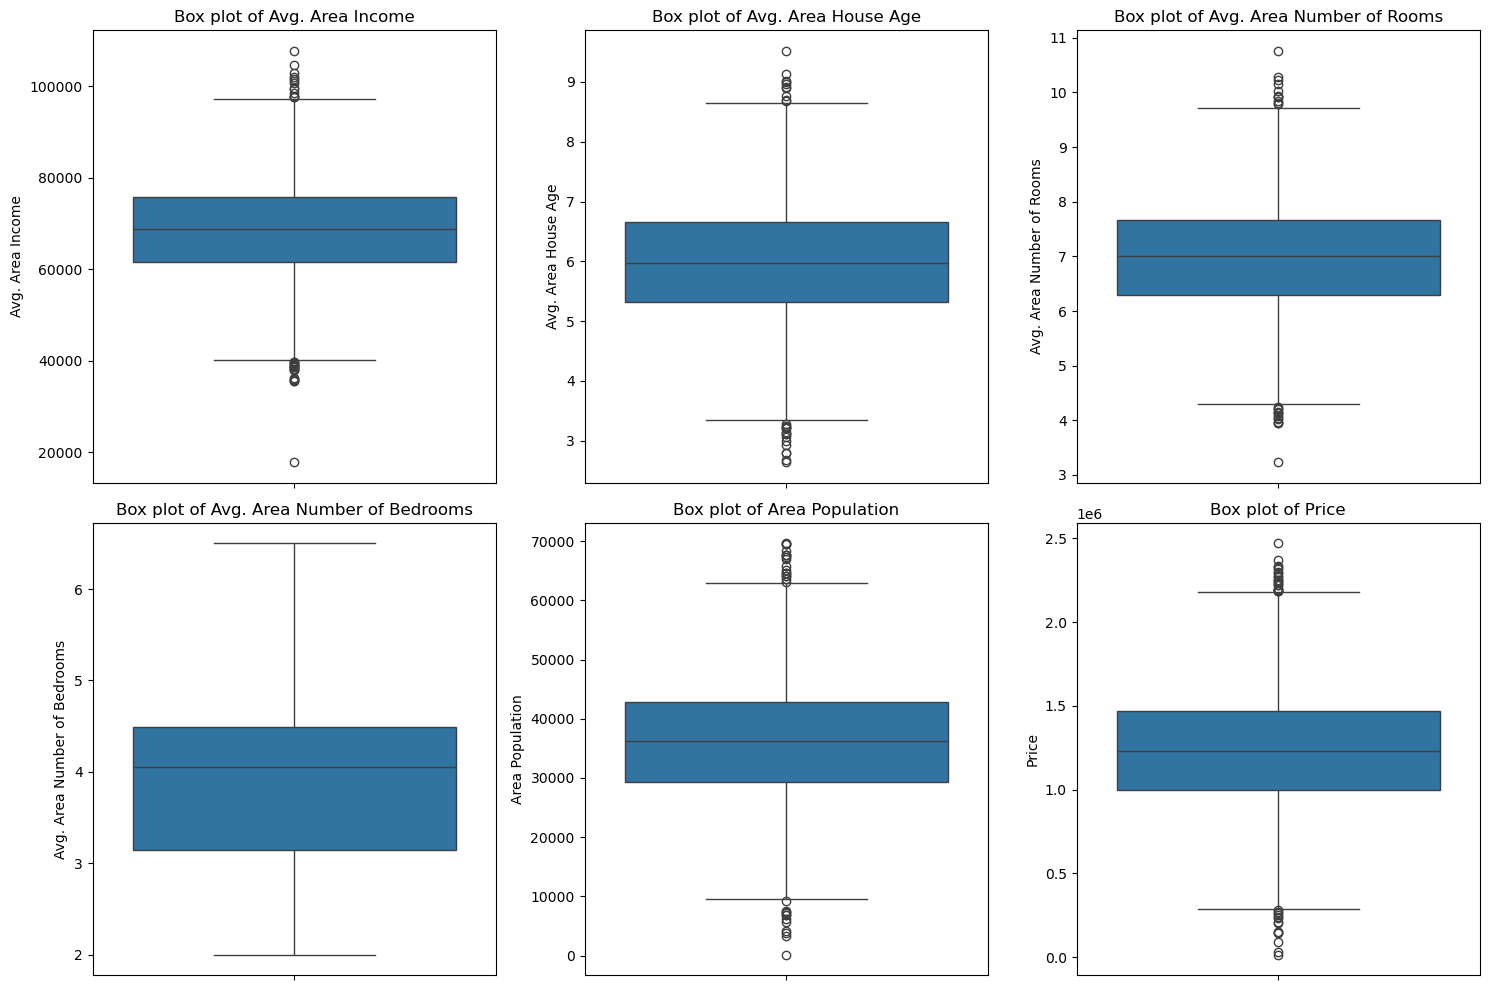

In [21]:
# Data Preprocessing

## checking for duplicates
print('Duplicate Rows:', df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('Duplicate Rows after removing duplicates:', df.duplicated().sum())
print('Dataset Shape after removing duplicates:', df.shape)
print('='*50)

## checking for null values
print('Missing Values in each column:\n', df.isnull().sum())
print('='*50)

## Displaying outliers numbers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Number of outliers in {col}: {outliers.shape[0]}')
    print('='*50)

## check for outliers using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


## Handling outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    

In [1]:
num_cols.remove('Price')  # Exclude target variable from outlier removal
X = df.drop(columns=['Price'])
y = df['Price']

## Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)
print('='*50)


## scaling numerical features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
print('First five rows of scaled training set:')
print(X_train.head())
print('='*50)
print('First five rows of scaled testing set:')
print(X_test.head())



NameError: name 'df' is not defined

In [2]:
# Model Building
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('First five predicted values:', y_pred[:5])
print('First five actual values:', y_test.values[:5])
print('='*50)

# show some analysis of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

NameError: name 'LinearRegression' is not defined

In [ ]:
# train model after removing outliers
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
df_ro = df.copy()
df_ro = remove_outliers_iqr(df_ro, 'Price')

# 
X_removed_outliers = df_ro.drop(columns=['Price'])
y_removed_outliers = df_ro['Price']
X_train_ro, X_test_ro, y_train_ro, y_test_ro = train_test_split(X_removed_outliers, y_removed_outliers, test_size=0.2, random_state=42)
X_train_ro[num_cols] = scaler.fit_transform(X_train_ro[num_cols])
X_test_ro[num_cols] = scaler.transform(X_test_ro[num_cols])

model_ro = LinearRegression()
model_ro.fit(X_train_ro, y_train_ro)
y_pred_ro = model_ro.predict(X_test_ro)
print('First five predicted values after removing outliers:', y_pred_ro[:5])
print('First five actual values after removing outliers:', y_test_ro.values[:5])
print('='*50)
print('Training set shape after removing outliers:', X_train_ro.shape, y_train_ro.shape)
print('Testing set shape after removing outliers:', X_test_ro.shape, y_test_ro.shape)
print('='*50)
# show some analysis of the model after removing outliers
mae_ro = mean_absolute_error(y_test_ro, y_pred_ro)
mse_ro = mean_squared_error(y_test_ro, y_pred_ro)
r2_ro = r2_score(y_test_ro, y_pred_ro)
print(f'Mean Absolute Error after removing outliers: {mae_ro}')
print(f'Mean Squared Error after removing outliers: {mse_ro}')
print(f'R-squared after removing outliers: {r2_ro}')

In [ ]:
# Save the trained models and scaler
import joblib

# Save the original model (with outliers)
joblib.dump(model, 'linear_regression_model.pkl')

# Save the model without outliers (better performing)
joblib.dump(model_ro, 'linear_regression_model_no_outliers.pkl')

# Save the scaler for preprocessing new data
joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler saved successfully!")
print("Files saved:")
print("- linear_regression_model.pkl")
print("- linear_regression_model_no_outliers.pkl") 
print("- scaler.pkl")

In [15]:
# Test values for web application testing
print("=== TEST VALUES FOR WEB APPLICATION ===")
print("\nUse these realistic values to test your Flask app:")
print("\n1. Average Test Case (based on dataset median):")
test_case_1 = {
    'Avg. Area Income': df['Avg. Area Income'].median(),
    'Avg. Area House Age': df['Avg. Area House Age'].median(),
    'Avg. Area Number of Rooms': df['Avg. Area Number of Rooms'].median(),
    'Avg. Area Number of Bedrooms': df['Avg. Area Number of Bedrooms'].median(),
    'Area Population': df['Area Population'].median()
}

for key, value in test_case_1.items():
    print(f"{key}: {value:.2f}")

print("\n2. High-End Test Case (75th percentile):")
test_case_2 = {
    'Avg. Area Income': df['Avg. Area Income'].quantile(0.75),
    'Avg. Area House Age': df['Avg. Area House Age'].quantile(0.75),
    'Avg. Area Number of Rooms': df['Avg. Area Number of Rooms'].quantile(0.75),
    'Avg. Area Number of Bedrooms': df['Avg. Area Number of Bedrooms'].quantile(0.75),
    'Area Population': df['Area Population'].quantile(0.75)
}

for key, value in test_case_2.items():
    print(f"{key}: {value:.2f}")

print("\n3. Budget Test Case (25th percentile):")
test_case_3 = {
    'Avg. Area Income': df['Avg. Area Income'].quantile(0.25),
    'Avg. Area House Age': df['Avg. Area House Age'].quantile(0.25),
    'Avg. Area Number of Rooms': df['Avg. Area Number of Rooms'].quantile(0.25),
    'Avg. Area Number of Bedrooms': df['Avg. Area Number of Bedrooms'].quantile(0.25),
    'Area Population': df['Area Population'].quantile(0.25)
}

for key, value in test_case_3.items():
    print(f"{key}: {value:.2f}")

print("\n4. Custom Realistic Test Case:")
test_case_4 = {
    'Avg. Area Income': 68000.00,
    'Avg. Area House Age': 6.5,
    'Avg. Area Number of Rooms': 7.2,
    'Avg. Area Number of Bedrooms': 4.1,
    'Area Population': 35000.0
}

for key, value in test_case_4.items():
    print(f"{key}: {value:.2f}")

# Let's predict what these test cases should return
print("\n=== EXPECTED PREDICTIONS ===")

# Prepare test data for prediction
test_cases = [test_case_1, test_case_2, test_case_3, test_case_4]
case_names = ["Average", "High-End", "Budget", "Custom"]

for i, (case, name) in enumerate(zip(test_cases, case_names)):
    # Convert to array format
    test_input = np.array([[
        case['Avg. Area Income'],
        case['Avg. Area House Age'], 
        case['Avg. Area Number of Rooms'],
        case['Avg. Area Number of Bedrooms'],
        case['Area Population']
    ]])
    
    # Scale the input
    test_scaled = scaler.transform(test_input)
    
    # Predict using the model without outliers (better model)
    prediction = model_ro.predict(test_scaled)
    
    print(f"\n{i+1}. {name} Case - Expected Price: ${prediction[0]:,.2f}")

print("\n" + "="*60)
print("Copy these values into your Flask web app to test!")

=== TEST VALUES FOR WEB APPLICATION ===

Use these realistic values to test your Flask app:

1. Average Test Case (based on dataset median):
Avg. Area Income: 68804.29
Avg. Area House Age: 5.97
Avg. Area Number of Rooms: 7.00
Avg. Area Number of Bedrooms: 4.05
Area Population: 36199.41

2. High-End Test Case (75th percentile):
Avg. Area Income: 75783.34
Avg. Area House Age: 6.65
Avg. Area Number of Rooms: 7.67
Avg. Area Number of Bedrooms: 4.49
Area Population: 42861.29

3. Budget Test Case (25th percentile):
Avg. Area Income: 61480.56
Avg. Area House Age: 5.32
Avg. Area Number of Rooms: 6.30
Avg. Area Number of Bedrooms: 3.14
Area Population: 29403.93

4. Custom Realistic Test Case:
Avg. Area Income: 68000.00
Avg. Area House Age: 6.50
Avg. Area Number of Rooms: 7.20
Avg. Area Number of Bedrooms: 4.10
Area Population: 35000.00

=== EXPECTED PREDICTIONS ===

1. Average Case - Expected Price: $1,237,916.87

2. High-End Case - Expected Price: $1,681,573.91

3. Budget Case - Expected Price

C:\Users\aliab\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\aliab\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\aliab\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\aliab\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\aliab\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnin